In [2]:
import numpy as np
import os

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.utils import to_categorical
K.set_image_dim_ordering('th')
from sklearn.preprocessing import MinMaxScaler

C:\Users\Erin.Ford\anaconda\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
cat = np.load('cat.npy')
penguin = np.load('penguin.npy')
ant = np.load('ant.npy')
bee = np.load('bee.npy')


# print number of images in dataset and numpy array size of each image
print ("no_of_pics, pixels_size")
print(cat.shape)
print(penguin.shape)
print(ant.shape)
print(bee.shape)


no_of_pics, pixels_size
(123202, 784)
(253791, 784)
(124612, 784)
(120890, 784)


In [4]:
#Add a column to each one as an identifier
cat = np.c_[cat, np.zeros(len(cat))]
penguin = np.c_[penguin, np.ones(len(penguin))]
ant = np.c_[ant, 2*np.ones(len(ant))]
bee = np.c_[bee, 3*np.ones(len(bee))]

In [5]:
def plot_samples(input_array, rows=1, cols=5, title=''):
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

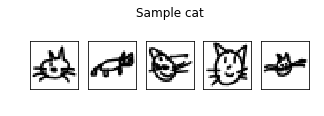

In [6]:
plot_samples(cat, title='Sample cat\n')

In [8]:
# merge the arrays, and split the features (X) and labels (y). Convert to float32 to save some memory.
X = np.concatenate((cat[:10000,:-1], penguin[:10000,:-1], ant[:10000,:-1], bee[:10000,:-1]), axis=0).astype('float32') # all columns but the last
y = np.concatenate((cat[:10000,-1], penguin[:10000,-1], ant[:10000,-1], bee[:10000,-1]), axis=0).astype('float32') # the last column

# train/test split (divide by 255 to obtain normalized values between 0 and 1)
# Use a 50:50 split, training the models on 10'000 samples and thus have plenty of samples to spare for testing.
X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.5,random_state=0)

In [9]:
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
num_classes = 4

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_train[0]

array([0., 1., 0., 0.], dtype=float32)

In [12]:
#create empty sequential model
model = Sequential()

In [13]:
#first hidden layer
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))

In [14]:
#second hidden layer
model.add(Dense(100, activation='relu'))

In [15]:
#final output layer where number of nodes corresponds to the number of y labels
model.add(Dense(num_classes, activation='softmax'))

In [16]:
#compile the model
model.compile(loss="categorical_crossentropy",
             optimizer ="adam", metrics=["accuracy"])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 404       
Total params: 89,004
Trainable params: 89,004
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs = 30,
    shuffle=True,
    verbose = 2
)
history
model.save_weights('quickdraw_neuralnet.h5')
model.save('quickdraw.model')
print ("Model is saved")

Train on 20000 samples, validate on 20000 samples
Epoch 1/30
 - 4s - loss: 0.6357 - acc: 0.7573 - val_loss: 0.5322 - val_acc: 0.8066
Epoch 2/30
 - 3s - loss: 0.4732 - acc: 0.8269 - val_loss: 0.4942 - val_acc: 0.8177
Epoch 3/30
 - 3s - loss: 0.3960 - acc: 0.8591 - val_loss: 0.4612 - val_acc: 0.8335
Epoch 4/30
 - 3s - loss: 0.3309 - acc: 0.8808 - val_loss: 0.4397 - val_acc: 0.8451
Epoch 5/30
 - 3s - loss: 0.2759 - acc: 0.9034 - val_loss: 0.4503 - val_acc: 0.8477
Epoch 6/30
 - 3s - loss: 0.2282 - acc: 0.9230 - val_loss: 0.4436 - val_acc: 0.8485
Epoch 7/30
 - 3s - loss: 0.1892 - acc: 0.9356 - val_loss: 0.5021 - val_acc: 0.8448
Epoch 8/30
 - 3s - loss: 0.1551 - acc: 0.9478 - val_loss: 0.5428 - val_acc: 0.8358
Epoch 9/30
 - 3s - loss: 0.1275 - acc: 0.9573 - val_loss: 0.5802 - val_acc: 0.8428
Epoch 10/30
 - 3s - loss: 0.1001 - acc: 0.9670 - val_loss: 0.6052 - val_acc: 0.8426
Epoch 11/30
 - 3s - loss: 0.0899 - acc: 0.9709 - val_loss: 0.6375 - val_acc: 0.8446
Epoch 12/30
 - 4s - loss: 0.0769 - 

In [19]:
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 1.1114247790113092, Accuracy: 0.84325


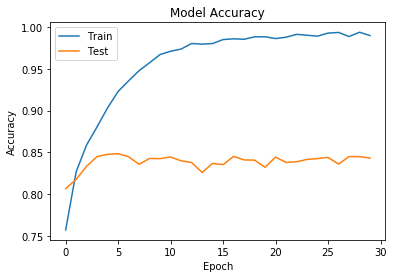

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

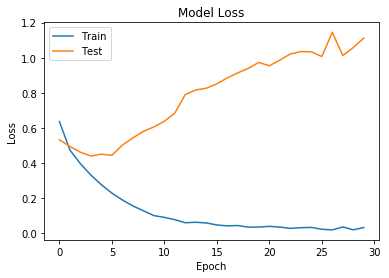

In [21]:
# Summarizing the history of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [22]:
model = load_model("quickdraw.model")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 404       
Total params: 89,004
Trainable params: 89,004
Non-trainable params: 0
_________________________________________________________________


In [24]:
filepath = "Penguin1.png"

In [25]:
from keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size = image_size, color_mode = "grayscale")
im

In [26]:
from keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(1, 28, 28)

In [27]:
image /= 255

img = image.flatten().reshape(-1, 28*28)
img.shape

(1, 784)

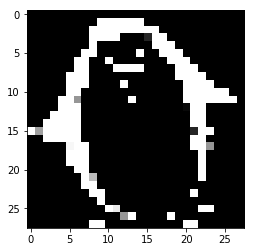

In [28]:
plt.imshow(img.reshape(28, 28), cmap = plt.cm.Greys)

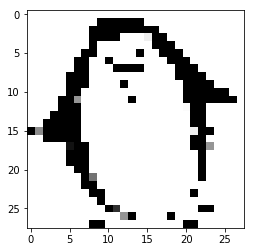

In [29]:
img = 1- img
plt.imshow(img.reshape(28,28), cmap = plt.cm.Greys)

model.predict_classes(img)

In [30]:
model.predict_classes(img)

array([1], dtype=int64)